### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [7]:
import pandas as pd 

data = pd.read_csv('C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/No supervisado/Clustering/Practica/data/drugLibTrain_raw.tsv', sep='\t') 
data 

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [27]:
data.dtypes

Unnamed: 0            int64
urlDrugName          object
rating                int64
effectiveness        object
sideEffects          object
condition            object
benefitsReview       object
sideEffectsReview    object
commentsReview       object
dtype: object

In [28]:
# Inspeccionamos las primeras filas para tener una idea de las columnas
data.describe(include='all')

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107.000000,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,NaN,502,NaN,5,5,1426,3031,2813,3046
top,NaN,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,NaN,63,NaN,1330,1019,236,20,112,6
mean,2080.607016,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,1187.998828,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1062.500000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2092.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3092.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(data.info()) # SI HAY DATOS FALTANTES 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB
None


In [12]:
# Filtramos las columnas numéricas y categóricas con menos de 10 categorías
numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = [col for col in data.select_dtypes(include=['object']).columns if data[col].nunique() < 10] 
categorical_cols

['effectiveness', 'sideEffects']

In [30]:
data['effectiveness'].unique() # LAS CATEGORIAS DE 'effectiveness' 

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [31]:
data['sideEffects'].unique() # LAS CATEGORIAS DE 'sideEffects' 

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [32]:
pd.get_dummies(data['effectiveness']) 

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
3102,False,True,False,False,False
3103,False,False,True,False,False
3104,False,False,False,True,False
3105,True,False,False,False,False


In [34]:
df_dummies_effectiveness = pd.get_dummies(data['effectiveness'], dtype='int')
df_dummies_effectiveness

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
3102,0,1,0,0,0
3103,0,0,1,0,0
3104,0,0,0,1,0
3105,1,0,0,0,0


In [35]:
df_dummies_sideEffects = pd.get_dummies(data['sideEffects'], dtype='int')
df_dummies_sideEffects 

,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
3102,0,1,0,0,0
3103,1,0,0,0,0
3104,0,0,1,0,0
3105,0,1,0,0,0


In [38]:
X = pd.concat([df_dummies_effectiveness, df_dummies_sideEffects, data['rating']], axis=1) 
X

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects,rating
0,0,1,0,0,0,0,1,0,0,0,4
1,0,1,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,1,0,10
3,0,0,0,1,0,0,1,0,0,0,3
4,0,0,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
3102,0,1,0,0,0,0,1,0,0,0,10
3103,0,0,1,0,0,1,0,0,0,0,1
3104,0,0,0,1,0,0,0,1,0,0,2
3105,1,0,0,0,0,0,1,0,0,0,8


In [79]:
X = pd.concat([df_dummies_effectiveness, df_dummies_sideEffects], axis=1) # SE AVERIGUARÁ SI ES CAPAZ DE HACER LA MISMA AGRUPACIÓN 
                                                                          # SIN CONSIDERAR EL 'rating' DE LAS VARIABLES 
X

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
0,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3102,0,1,0,0,0,0,1,0,0,0
3103,0,0,1,0,0,1,0,0,0,0
3104,0,0,0,1,0,0,0,1,0,0
3105,1,0,0,0,0,0,1,0,0,0


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [80]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

rand_state = 42 

models = [] 

for k in range(2, 100): 
    km = KMeans(n_clusters=k, random_state=rand_state) 
    km.fit(X) 
    models.append(km) 

c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (26). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (27). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (25) found smaller than n_clusters (29). Pos

In [78]:
insertias = [m.inertia_ for m in models] 
insertias

[3872.31544409907,
 3452.6772305004483,
 2445.1222060649634,
 2095.4124762042206,
 1745.133403671518,
 1521.1522356882697,
 1332.6052892633775,
 1154.676618172497,
 974.136514696599,
 849.9098291577911,
 721.8494641205292,
 652.6243550097819,
 585.4645523575666,
 452.05391405969374,
 386.3978856908999,
 296.4223988542785,
 259.04446833926113,
 202.26450411743647,
 172.60605732932524,
 147.8252618325204,
 91.14466917644741,
 65.17975689574568,
 27.717391304347824,
 8.009707193770813e-28,
 7.715334579561057e-28,
 7.742125228052455e-28,
 1.0204572551144824e-27,
 8.906218434715835e-28,
 9.707017216697131e-28,
 1.04120135024898e-27,
 9.814405625948705e-28,
 9.39195722598974e-28,
 9.763774853640709e-28,
 1.212805126819534e-27,
 1.2458481142823914e-27,
 1.142124557121992e-27,
 1.2470912057649962e-27,
 1.3055429388359057e-27,
 1.438368693755206e-27,
 1.4248893026674342e-27,
 1.4214070768832363e-27,
 1.4876213668914958e-27,
 1.6565012044452057e-27,
 1.7385589163997238e-27,
 1.5657397817377643e-

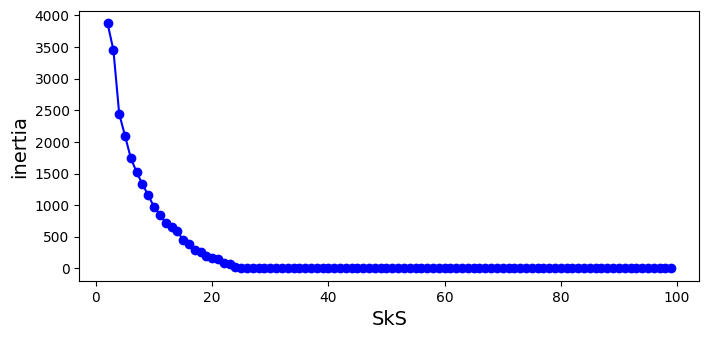

In [71]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 100), insertias, "bo-") 
plt.xlabel("SkS", fontsize=14)
plt.ylabel("inertia", fontsize=14) 
plt.show()  

Text(0, 0.5, 'silhuette_score')

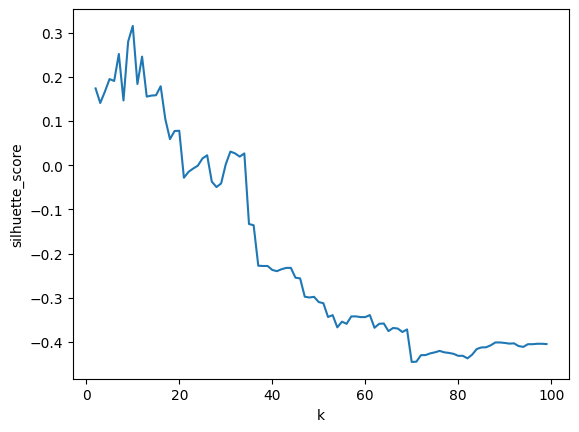

In [94]:
plt.plot(range(2, 100), silhouette_score_list) 
plt.xlabel("k")
plt.ylabel("silhuette_score") 

In [67]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in models] 
silhouette_score_list # ES LA INVERSA DE LA CURVA DE ARRIBA 

[0.17394049962258318,
 0.1409296107984225,
 0.16661582461827187,
 0.19506151006454786,
 0.19080082247103888,
 0.2519337016307118,
 0.14666993960024846,
 0.2798437285140696,
 0.31547078403842577,
 0.1839917857860395,
 0.24595717352377924,
 0.15538173746949446,
 0.15764435567285406,
 0.15847492639789323,
 0.17877282673981176,
 0.10440914949470753,
 0.05903141411860253,
 0.07744769291297479,
 0.07805619344254203,
 -0.02844457980962396,
 -0.014995224783223685,
 -0.007516092488690196,
 -0.0009699058240799889,
 0.015335571450492958,
 0.02250816819573696,
 -0.03711101783171752,
 -0.04945445307423913,
 -0.04143270038737525,
 0.0019889621834037565,
 0.030888152641314278,
 0.026781300907949973,
 0.019459301111076886,
 0.026699328190184245,
 -0.13313680447569612,
 -0.13603751718537252,
 -0.2276462647463958,
 -0.22826016016121548,
 -0.22822800293623224,
 -0.23716191395432937,
 -0.2400011027225938,
 -0.2355845916557853,
 -0.232606009421943,
 -0.2325150384024159,
 -0.2547578495667072,
 -0.2563703517

Text(0, 0.5, 'silhouette_score')

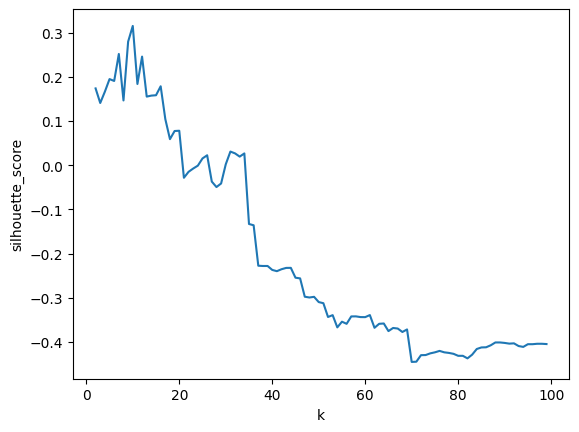

In [73]:
plt.plot(range(2, 100), silhouette_score_list) # EL GRÁFICO DE LA SILHOUETTE_SCORE NO TIENE UN TOPE AUN POR LO CUAL FALTA INFORMACION 
plt.xlabel("k")
plt.ylabel("silhouette_score") 

In [81]:
km = KMeans(n_clusters=25, random_state=rand_state) # SE ENTRENA EL SIGUIENTE MODELO 
km.fit(X)

KMeans(n_clusters=25, random_state=42)

In [89]:
df_cluster = X.copy() # SE LE AGREGÓ EL CLUSTER AL QUE PERTENECEN 
df_cluster["clusters"] = km.labels_ 
df_cluster 

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects,clusters
0,0,1,0,0,0,0,1,0,0,0,4
1,0,1,0,0,0,0,0,0,0,1,10
2,0,1,0,0,0,0,0,0,1,0,3
3,0,0,0,1,0,0,1,0,0,0,21
4,0,0,0,1,0,0,0,0,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...
3102,0,1,0,0,0,0,1,0,0,0,4
3103,0,0,1,0,0,1,0,0,0,0,6
3104,0,0,0,1,0,0,0,1,0,0,17
3105,1,0,0,0,0,0,1,0,0,0,2


In [90]:
df_cluster["clusters"].value_counts() # CUANTOS REGISTROS PERTENECEN A CADA CLUSTER 

clusters
3     529
4     482
2     361
1     255
0     206
7     197
9     122
8     119
10     86
12     85
11     81
13     76
6      75
5      67
15     55
16     46
17     43
21     37
14     35
19     30
18     30
20     27
23     26
22     20
24     17
Name: count, dtype: int64

<Axes: ylabel='count'>

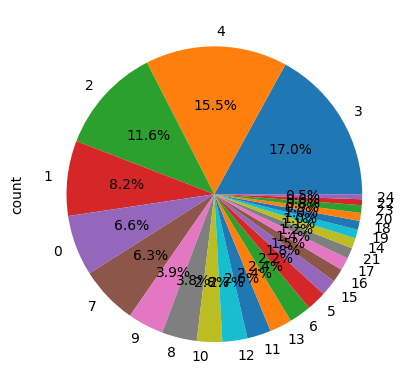

In [91]:
df_cluster["clusters"].value_counts().plot.pie(autopct="%.1f%%")

In [95]:
df_cluster.groupby("clusters").describe()

Considerably Effective                                     \
                          count mean  std  min  25%  50%  75%  max   
clusters                                                             
0                         206.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                         255.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
2                         361.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
3                         529.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                         482.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5                          67.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6                          75.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7                         197.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
8                         119.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9                         122.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10                         86.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11                         81.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12                         85.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
13                         76.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14                         35.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
15                         55.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
16                         46.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
17                         43.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
18                         30.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
19                         30.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
20                         27.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21                         37.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
22                         20.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
23                         26.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
24                         17.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         Highly Effective       ... No Side Effects      Severe Side Effects  \
                    count mean  ...             75%  max               count   
clusters                        ...                                            
0                   206.0  1.0  ...             0.0  0.0               206.0   
1                   255.0  0.0  ...             1.0  1.0               255.0   
2                   361.0  0.0  ...             0.0  0.0               361.0   
3                   529.0  1.0  ...             1.0  1.0               529.0   
4                   482.0  1.0  ...             0.0  0.0               482.0   
5                    67.0  0.0  ...             0.0  0.0                67.0   
6                    75.0  0.0  ...             0.0  0.0                75.0   
7                   197.0  0.0  ...             0.0  0.0               197.0   
8                   119.0  0.0  ...             0.0  0.0               119.0   
9                   122.0  0.0  ...             0.0  0.0               122.0   
10                   86.0  1.0  ...             0.0  0.0                86.0   
11                   81.0  0.0  ...             1.0  1.0                81.0   
12                   85.0  0.0  ...             0.0  0.0                85.0   
13                   76.0  0.0  ...             0.0  0.0                76.0   
14                   35.0  0.0  ...             1.0  1.0                35.0   
15                   55.0  0.0  ...             0.0  0.0                55.0   
16                   46.0  0.0  ...             0.0  0.0                46.0   
17                   43.0  0.0  ...             0.0  0.0                43.0   
18                   30.0  0.0  ...             0.0  0.0                30.0   
19                   30.0  0.0  ...             1.0  1.0                30.0   
20                   27.0  1.0  ...             0.0  0.0                27.0   
21                   37.0  0.0  ...             0.0  0.0                37.0   
22                   20.0  0.0  ...             

In [96]:
import numpy as np 

pd.DataFrame(np.round(models[2].cluster_centers_, 2), columns=X.columns)

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
0,0.32,0.34,0.07,0.07,0.20,0.00,-0.00,1.0,-0.00,-0.00
1,1.00,0.00,0.00,0.00,-0.00,0.04,0.49,-0.0,0.35,0.12
2,-0.00,0.00,0.32,0.23,0.46,0.18,0.28,-0.0,0.23,0.31
3,-0.00,1.00,0.00,0.00,0.00,0.02,0.43,-0.0,0.47,0.08


In [97]:
from sklearn.tree import DecisionTreeClassifier # PARA INTENTAR ENTENDER COMO EL ALGORITMO NO SUPERVISADO CLASIFICO LOS DATOS EN
#CLUSTERS, SE REALIZA LO SIGUIENTE: 
# -SE COGEN LOS DATOS SIN LOS CLUSTERS, LOS CLUSTERS SOLAMENTE SE TOMAN COMO ETIQUETAS. 
# - MEDIANTE UN MODELO EXPLICATIVO COMPUESTO POR ARBOLES DE DESICIÓN 

X_tree = df_cluster.drop(columns="clusters")
y_tree = df_cluster["clusters"] 

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_tree, y_tree) 

DecisionTreeClassifier(max_depth=4)

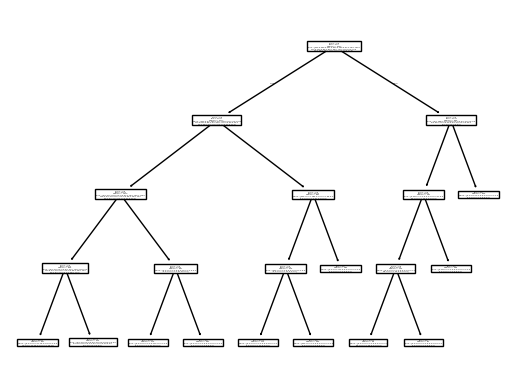

In [98]:
from sklearn.tree import plot_tree 

plot_tree(clf);  

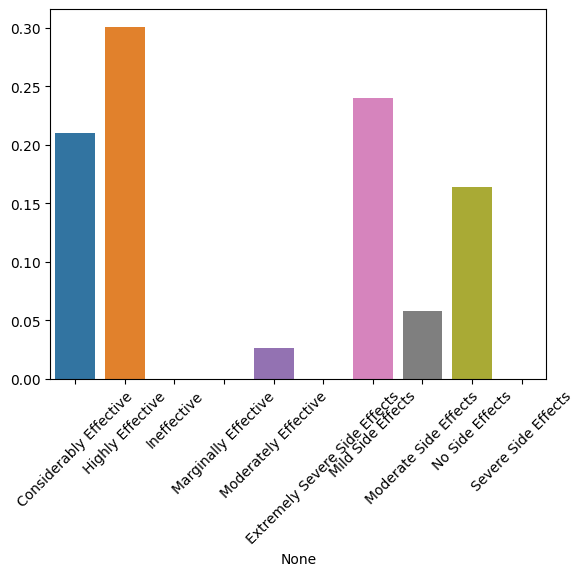

In [99]:
import seaborn as sns 

sns.barplot(x=X_tree.columns, y=clf.feature_importances_, hue=X_tree.columns)
plt.xticks(rotation=45); 

In [ ]:
# EL RESULTADO QUE DEVUELVE EL GRÁFICO SEÑALA QUE EL MODELO NO SUPERVISADO HA TOMADO DECISIONES DE AGRUPAMIENTO EN UN 90% DE 
# LAS VECES BASADO EN EL RATING DE LOS VALORES, Y EN UN 10% DE LAS OCASIONES LA DECISIÓN DE AGRUPAMIENTO LA TOMÓ EN BASE A LA
# VARIABLE 'considerably Effective'  

# EN UN SEGUNDO CASO, AL QUITAR LA VARIABLE 'rating' EL MODELO CONSIDERA PARA AGRUPAR LOS DATOS LAS VARIABLES 'Considerabley Effective',
# 'Highly Effective', 'Moderately Effective', 'Mild Side Effects', 'Moderate Side Effects' Y 'No Side Effects' 

In [18]:
# Identificar el mejor número de clusters (K)
best_k = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]
print(f"La mejor K es: {best_k}")

La mejor K es: 2


In [20]:
# Entrenar el modelo KMeans con la mejor K
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(data_encoded)
data_encoded['cluster'] = kmeans.labels_ 
data_encoded['cluster'] 

0       0
1       0
2       1
3       0
4       1
       ..
3102    1
3103    0
3104    1
3105    0
3106    0
Name: cluster, Length: 3107, dtype: int32

#### Genera el K Means 

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [23]:
cluster_counts = data_encoded['cluster'].value_counts() 
cluster_counts 

cluster
0    1574
1    1533
Name: count, dtype: int64

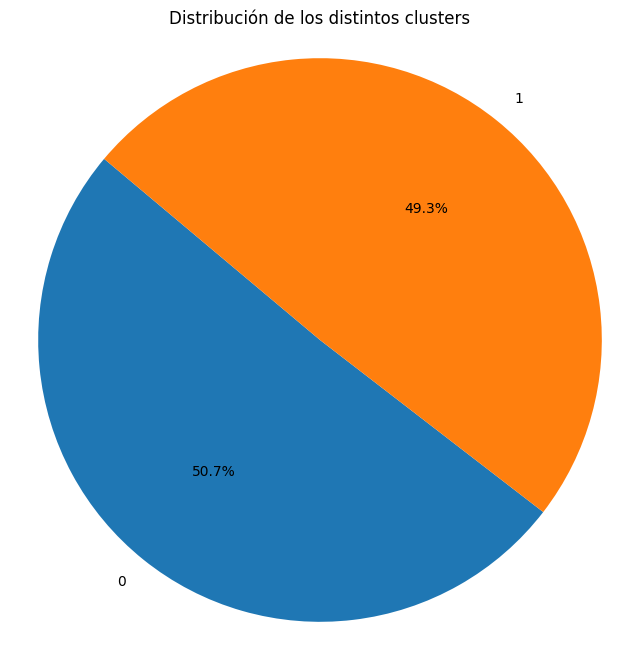

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los distintos clusters')
plt.axis('equal')
plt.show() 